In [ ]:
import librosa, numpy as np, scipy


def extract_features(directory, file):
    name = f'{directory}/{file}'
    y, sr = librosa.load(name, mono=True, duration=5)

    features = []
    features.extend([np.mean(e) for e in librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)])                # mfcc_mean
    features.extend([np.std(e) for e in librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)])                 # mfcc_std
    features.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis = 0)[0])            # cent_mean
    features.append(np.std(librosa.feature.spectral_centroid(y=y,sr=sr).T, axis = 0)[0])              # cent_std
    features.append(scipy.stats.skew(librosa.feature.spectral_centroid(y=y,sr=sr).T, axis = 0)[0])    # cent_skew
    features.append(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])             # rolloff_mean
    features.append(np.std(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])              # rolloff_std

    return features


[-488.57846, 118.22754, 4.141036, 49.61822, -1.0441532, 11.778144, 2.7909436, 12.020875, 3.5438712, -2.4106112, 6.872463, 0.6278073, 2.8959584, 0.505188, 3.2801769, -4.175694, -2.032902, -3.4126856, -5.841621, -5.138093, 61.169106, 34.4641, 13.7729845, 20.761726, 19.805552, 17.09819, 15.188805, 7.63562, 8.227044, 8.732654, 4.9454646, 6.1952286, 5.811354, 5.447278, 5.1367345, 6.2628613, 7.047043, 5.376924, 5.2994747, 5.8327727, 1389.8202006234892, 734.2225920394934, 1.719445353819062, 3003.3194015275185, 1472.2015160742467]


,mfccs_mean_0,mfccs_mean_1,mfccs_mean_2,mfccs_mean_3,mfccs_mean_4,mfccs_mean_5,mfccs_mean_6,mfccs_mean_7,mfccs_mean_8,mfccs_mean_9,...,mfccs_std_10,mfccs_std_11,mfccs_std_12,mfccs_std_13,mfccs_std_14,mfccs_std_15,mfccs_std_16,mfccs_std_17,mfccs_std_18,mfccs_std_19
0,-580.675293,70.750694,2.007143,34.621315,-5.266914,3.557154,-36.969387,9.143361,-20.942171,-10.462289,...,5.416898,6.217893,8.041992,8.237404,5.948556,10.126081,5.814997,7.027631,6.55477,11.226099


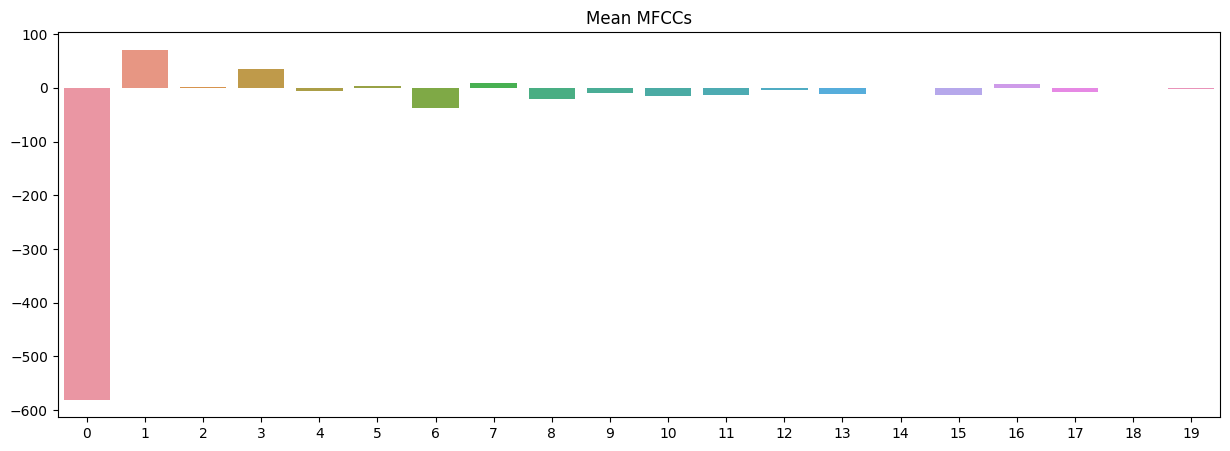

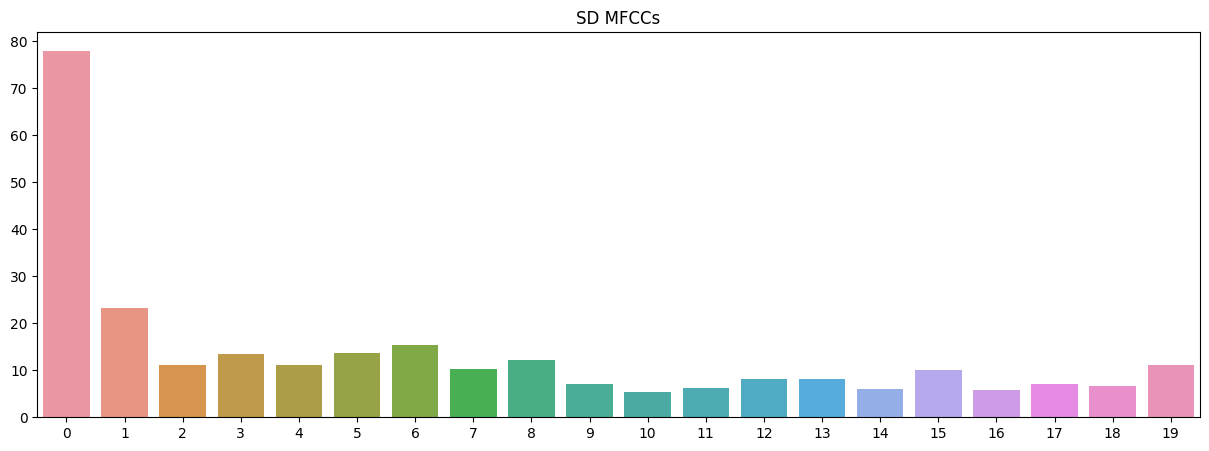

In [ ]:
# Feature Generation
# MFCCs
mfccs_mean=np.mean(mfccs,axis=1)
mfccs_std=np.std(mfccs,axis=1)

coeffs=np.arange(0,20)
plt.figure(figsize=(15,5))
plt.title('Mean MFCCs')
sns.barplot(x=coeffs,y=mfccs_mean)

plt.figure(figsize=(15,5))
plt.title('SD MFCCs')
sns.barplot(x=coeffs,y=mfccs_std)
# Generate the chroma Dataframe
mfccs_df=pd.DataFrame()
for i in range(0,20):
    mfccs_df['mfccs_mean_'+str(i)]=mfccs_mean[i]
for i in range(0,20):
    mfccs_df['mfccs_std_'+str(i)]=mfccs_mean[i]
mfccs_df.loc[0]=np.concatenate((mfccs_mean,mfccs_std),axis=0)
mfccs_df

In [ ]:
# Spectral Features
# Spectral Centroid

cent_mean=np.mean(cent)
cent_std=np.std(cent)
cent_skew=scipy.stats.skew(cent,axis=1)[0]
print('Mean: '+str(cent_mean))
print('SD: '+str(cent_std))
print('Skewness: '+str(cent_skew))

Mean: 2823.921788231735
SD: 1190.8871308704165
Skewness: 0.9236814641223974


In [ ]:
# Spectral Rolloff
rolloff_mean=np.mean(rolloff)
rolloff_std=np.std(rolloff)
rolloff_skew=scipy.stats.skew(rolloff,axis=1)[0]
print('Mean: '+str(rolloff_mean))
print('SD: '+str(rolloff_std))
print('Skewness: '+str(rolloff_skew))

Mean: 5530.048712782973
SD: 1451.340257286569
Skewness: -1.300132749057616


In [ ]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pathlib
import csv


import warnings
warnings.filterwarnings('ignore')

In [ ]:
def extract_features(directory, file, label):
    name = f'{directory}/{file}'
    y, sr = librosa.load(name, mono=True, duration=5)

    features = []
    features.append(file) # filename
    features.extend([np.mean(e) for e in librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)])  # mfcc_mean<0..20>
    features.extend([np.std(e) for e in librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)])   # mfcc_std
    features.append(np.mean(librosa.feature.spectral_centroid(y=y, sr=sr).T, axis = 0)[0])     # cent_mean
    features.append(np.std(librosa.feature.spectral_centroid(y=y,sr=sr).T, axis = 0)[0])       # cent_std
    features.append(scipy.stats.skew(librosa.feature.spectral_centroid(y=y,sr=sr).T, axis = 0)[0])    # cent_skew
    features.append(np.mean(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])               # rolloff_mean
    features.append(np.std(librosa.feature.spectral_rolloff(y=y, sr=sr).T, axis = 0)[0])            # rolloff_std


    features.append(label)
    return features






In [ ]:
buffer = []
buffer_size = 500
buffer_counter = 0

# Создание заголовка для файла CSV.
header = ['filename']
header.extend([f'mfcc_mean{i}' for i in range(1, 21)])
header.extend([f'mfcc_std{i}' for i in range(1, 21)])
header.extend(['cent_mean', 'cent_std', 'cent_skew', 'rolloff_mean', 'rolloff_std',
               'label'])

with open('dataset.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(header)
    for directory, files in [(emo_path[i], i) for i in range(4)]:
        for file in files:
            features = extract_features('directory', file)
            if buffer_counter + 1 == buffer_size:
                buffer.append(features)
                writer.writerows(buffer)
                print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")
                buffer = []
                buffer_counter = 0
            else:
                buffer.append(features)
                buffer_counter += 1
        if buffer:
            writer.writerows(buffer)
            print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")
        print(f"- [{directory.split('/')[-1]}] Writing complete")
        buffer = []
        buffer_counter = 0

In [ ]:
#Cписки файлов
sad_dir, _, _files = next(os.walk('../input/audioset/Training_Data/human'))
spoof_dir, _, spoof_files = next(os.walk('../input/audioset/Training_Data/spoof'))
print(f"Human files: {len(human_files)}\nSpoof files: {len(spoof_files)}")


In [ ]:
buffer = []
buffer_size = 5000
buffer_counter = 0

# Создание заголовка для файла CSV.
header = ['filename']
header.extend([f'mfcc_mean{i}' for i in range(1, 21)])
header.extend([f'mfcc_std{i}' for i in range(1, 21)])
header.extend(['cent_mean', 'cent_std', 'cent_skew', 'rolloff_mean', 'rolloff_std',
               'label'])
cnt_no = 0
cnt_yes = 0
with open('dataset.csv', 'w', newline='') as file:
    writer = csv.writer(file, delimiter=',')
    writer.writerow(header)
    for directory, files in [(i, emo_path[i]) for i in emo_path]:
        for file in files:
            try:
                feates = extract_features('/content/drive/MyDrive/SER/crowd/crowd_train', file)
                cnt_yes += 1
                print(cnt_yes)


                if buffer_counter + 1 == buffer_size:
                    buffer.append(features)
                    writer.writerows(buffer)
                    print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")
                    buffer = []
                    buffer_counter = 0
                else:
                    buffer.append(features)
                    buffer_counter += 1
            except Exception:
                cnt_no+=1
        if buffer:
            writer.writerows(buffer)
            print(f"- [{directory.split('/')[-1]}] Write {len(buffer)} rows")
        print(f"- [{directory.split('/')[-1]}] Writing complete")
        buffer = []
        buffer_counter = 0

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
- [angry] Write 15 rows
- [angry] Writing complete
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
- [neutral] Write 100 rows
- [neutral] Writing complete
116
117
118
119
120
121
122
123
124
- [positive] Write 9 rows
- [positive] Writing complete
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
- [sad] Write 91 rows
- [sad] Writing complete


In [ ]:
pd.read_csv('dataset.csv')

,filename,mfcc_mean1,mfcc_mean2,mfcc_mean3,mfcc_mean4,mfcc_mean5,mfcc_mean6,mfcc_mean7,mfcc_mean8,mfcc_mean9,...,mfcc_std17,mfcc_std18,mfcc_std19,mfcc_std20,cent_mean,cent_std,cent_skew,rolloff_mean,rolloff_std,label
0,fac4e3a9599d25160e5547c8aacd4859.wav,-373.15768,89.95905,7.369531,36.47413,-9.161144,15.016801,-17.901062,-0.220714,-12.77981,...,6.757374,8.309457,7.520055,7.612265,2142.574678,933.16978,0.580165,4543.904622,1811.938107,wavs
1,fac4e3a9599d25160e5547c8aacd4859.wav,-373.15768,89.95905,7.369531,36.47413,-9.161144,15.016801,-17.901062,-0.220714,-12.77981,...,6.757374,8.309457,7.520055,7.612265,2142.574678,933.16978,0.580165,4543.904622,1811.938107,wavs
2,fac4e3a9599d25160e5547c8aacd4859.wav,-373.15768,89.95905,7.369531,36.47413,-9.161144,15.016801,-17.901062,-0.220714,-12.77981,...,6.757374,8.309457,7.520055,7.612265,2142.574678,933.16978,0.580165,4543.904622,1811.938107,wavs
3,fac4e3a9599d25160e5547c8aacd4859.wav,-373.15768,89.95905,7.369531,36.47413,-9.161144,15.016801,-17.901062,-0.220714,-12.77981,...,6.757374,8.309457,7.520055,7.612265,2142.574678,933.16978,0.580165,4543.904622,1811.938107,wavs
4,fac4e3a9599d25160e5547c8aacd4859.wav,-373.15768,89.95905,7.369531,36.47413,-9.161144,15.016801,-17.901062,-0.220714,-12.77981,...,6.757374,8.309457,7.520055,7.612265,2142.574678,933.16978,0.580165,4543.904622,1811.938107,wavs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79625,fac4e3a9599d25160e5547c8aacd4859.wav,-373.15768,89.95905,7.369531,36.47413,-9.161144,15.016801,-17.901062,-0.220714,-12.77981,...,6.757374,8.309457,7.520055,7.612265,2142.574678,933.16978,0.580165,4543.904622,1811.938107,wavs
79626,fac4e3a9599d25160e5547c8aacd4859.wav,-373.15768,89.95905,7.369531,36.47413,-9.161144,15.016801,-17.901062,-0.220714,-12.77981,...,6.757374,8.309457,7.520055,7.612265,2142.574678,933.16978,0.580165,4543.904622,1811.938107,wavs
79627,fac4e3a9599d25160e5547c8aacd4859.wav,-373.15768,89.95905,7.369531,36.47413,-9.161144,15.016801,-17.901062,-0.220714,-12.77981,...,6.757374,8.309457,7.520055,7.612265,2142.574678,933.16978,0.580165,4543.904622,1811.938107,wavs
79628,fac4e3a9599d25160e5547c8aacd4859.wav,-373.15768,89.95905,7.369531,36.47413,-9.161144,15.016801,-17.901062,-0.220714,-12.77981,...,6.757374,8.309457,7.520055,7.612265,2142.574678,933.16978,0.580165,4543.904622,1811.938107,wavs


In [ ]:
import pandas as pd
import jsonlines


setup = {}   # id: dict (with all the info)
with jsonlines.open('drive/MyDrive/SER/paper_setups/paper_setups/crowd_large.jsonl') as reader:
    for obj in reader:
        setup[obj['id']] = obj

setup


{'475e76f77ac1ed7cabafca740b15b32a': {'id': '475e76f77ac1ed7cabafca740b15b32a',
  'tensor': '../features/475e76f77ac1ed7cabafca740b15b32a.npy',
  'wav_length': 2.4530000000000003,
  'label': 0,
  'emotion': 'angry'},
 '2f9438ef68395c70a8714dc373a49d11': {'id': '2f9438ef68395c70a8714dc373a49d11',
  'tensor': '../features/2f9438ef68395c70a8714dc373a49d11.npy',
  'wav_length': 4.64,
  'label': 2,
  'emotion': 'neutral'},
 '9937036a9c0dba20eecbffddd00f2be2': {'id': '9937036a9c0dba20eecbffddd00f2be2',
  'tensor': '../features/9937036a9c0dba20eecbffddd00f2be2.npy',
  'wav_length': 4.34175,
  'label': 2,
  'emotion': 'neutral'},
 'fb0ae78586a235018103acec22a80a8f': {'id': 'fb0ae78586a235018103acec22a80a8f',
  'tensor': '../features/fb0ae78586a235018103acec22a80a8f.npy',
  'wav_length': 3.9005625,
  'label': 2,
  'emotion': 'neutral'},
 '196dcf9e1aaac46c2aee45e7f6adfb92': {'id': '196dcf9e1aaac46c2aee45e7f6adfb92',
  'tensor': '../features/196dcf9e1aaac46c2aee45e7f6adfb92.npy',
  'wav_length': 

In [ ]:
! pip install jsonlines

In [ ]:
emotions ={'angry': 0, 'neutral': 0, 'positive': 0, 'sad': 0}
for i in setup:
    emotions[setup[i]['emotion']] +=1


emotions


{'angry': 15674, 'neutral': 97816, 'positive': 14227, 'sad': 21152}

{'angry': 15674, 'neutral': 97816, 'positive': 14227, 'sad': 21152}

In [ ]:
emo_path = {i:[] for i in emotions}

for emo in emo_path:
    for i in setup:
        if setup[i]['emotion'] == emo:
            emo_path[emo].append(setup[i]['id'] + '.wav')

100

In [ ]:
write_path = 'drive/MyDrive/SER/Generated'
sample_path = '/content/drive/MyDrive/SER/podcast/podcast_train/wavs/009bff3c48271cd56f085ad4217cbcb2.wav'


def process_wav(path, emotion):



In [ ]:
!pip install librosa

In [ ]:
%matplotlib inline
import librosa
import librosa.display
import IPython
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
audio_data = sample_path
y, sr = librosa.load(audio_data)
print(type(y), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [ ]:
print(y.shape, sr)

(64827,) 22050


In [ ]:
print(y, sr)

[ 0.          0.          0.         ... -0.0010049  -0.000693
 -0.00030504] 22050


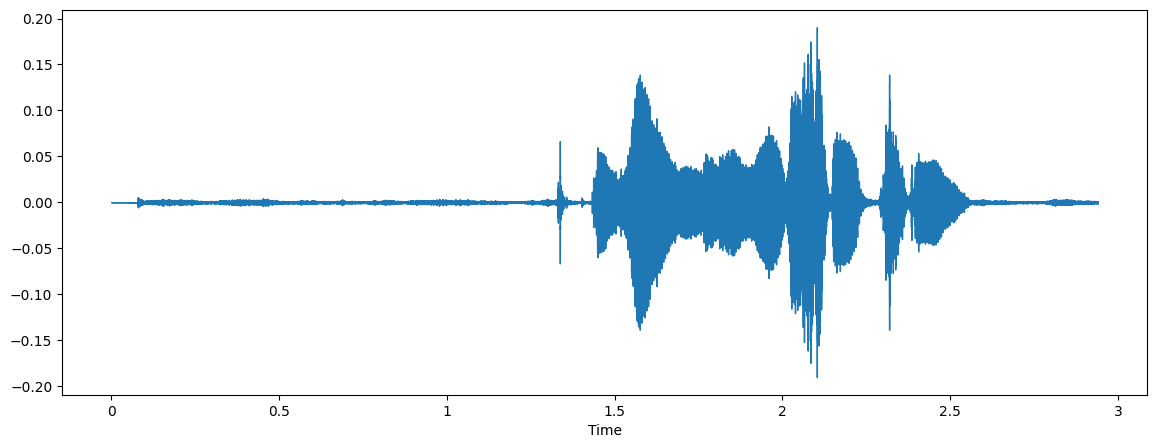

In [ ]:
import IPython.display as ipd
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(audio_data)

Text(0.5, 1.0, 'Harmonic + Percussive')

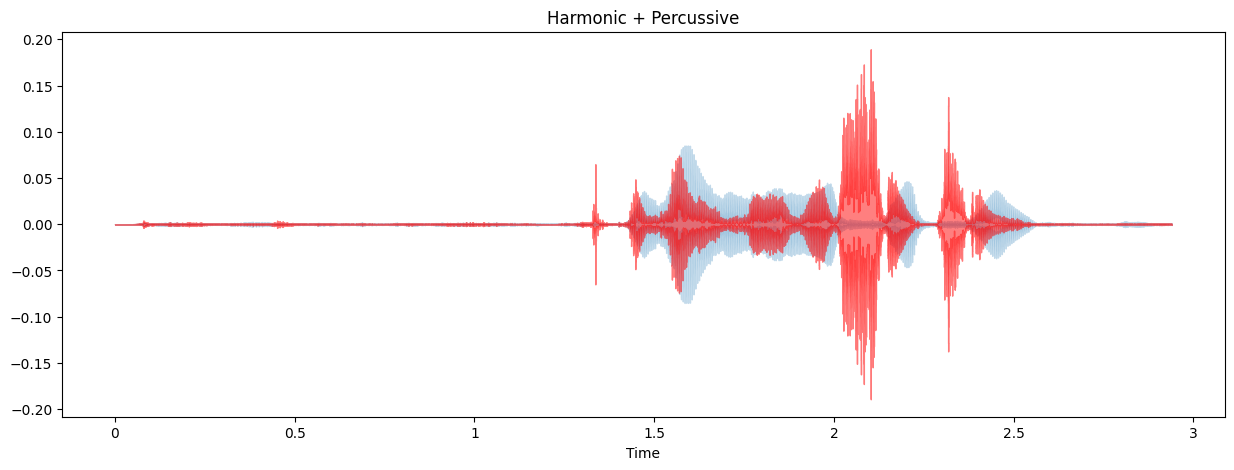

In [ ]:
# Seperation of Harmonic and Percussive Signals
y_harmonic, y_percussive = librosa.effects.hpss(y)
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y_harmonic, sr=sr, alpha=0.25)
librosa.display.waveshow(y_percussive, sr=sr, color='r', alpha=0.5)
plt.title('Harmonic + Percussive')

Detected Tempo: 117.45383522727273 beats/min


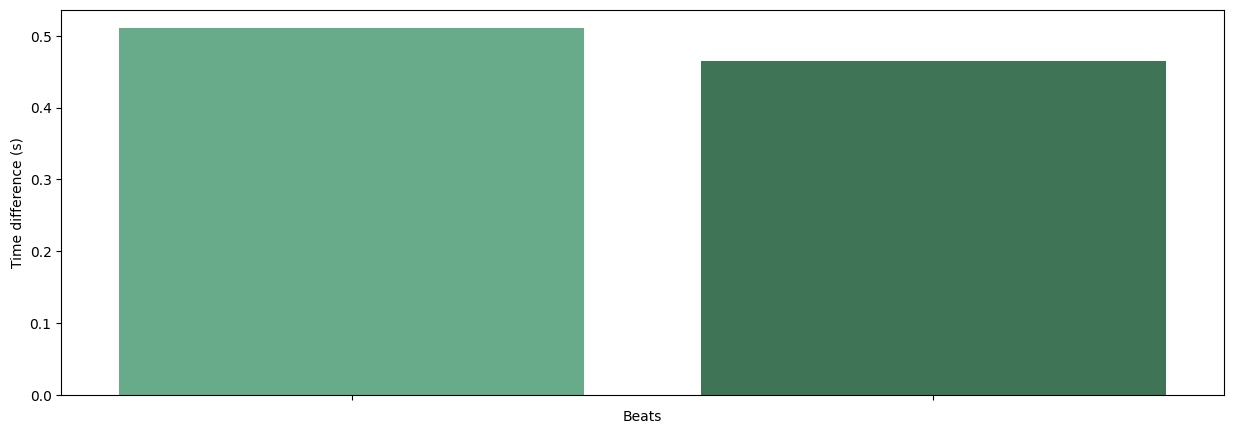

In [ ]:
# Beat Extraction
tempo, beat_frames = librosa.beat.beat_track(y=y_percussive,sr=sr)
print('Detected Tempo: '+str(tempo)+ ' beats/min')
beat_times = librosa.frames_to_time(beat_frames, sr=sr)
beat_time_diff=np.ediff1d(beat_times)
beat_nums = np.arange(1, np.size(beat_times))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
ax.set_ylabel("Time difference (s)")
ax.set_xlabel("Beats")
g=sns.barplot(x=beat_nums, y=beat_time_diff, palette="BuGn_d",ax=ax)
g=g.set(xticklabels=[])

/usr/local/lib/python3.10/dist-packages/librosa/core/spectrum.py:256: UserWarning: n_fft=1024 is too large for input signal of length=1013
  warnings.warn(


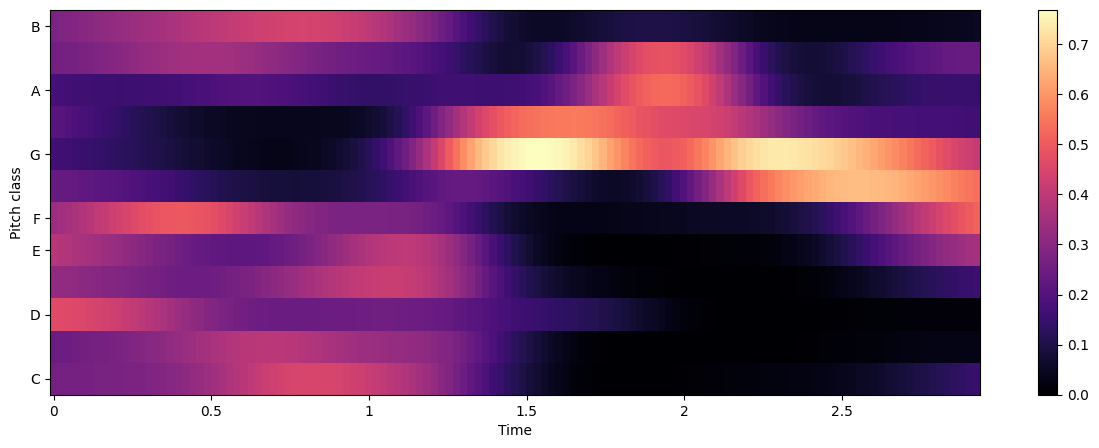

In [ ]:
#Chroma Energy Normalized (CENS)
chroma=librosa.feature.chroma_cens(y=y_harmonic, sr=sr)
plt.figure(figsize=(15, 5))
librosa.display.specshow(chroma,y_axis='chroma', x_axis='time')
plt.colorbar()

Text(0.5, 1.0, 'MFCC')

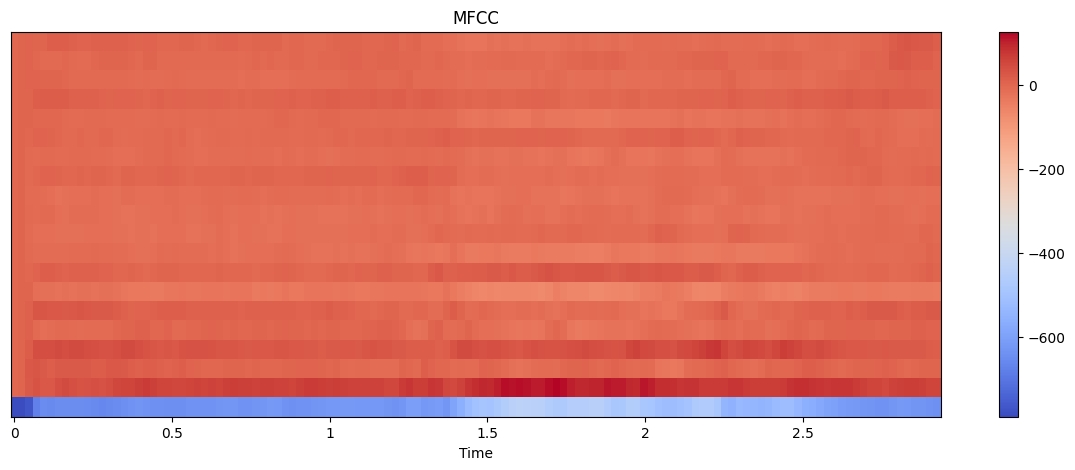

In [ ]:
mfccs = librosa.feature.mfcc(y=y_harmonic, sr=sr, n_mfcc=20)
plt.figure(figsize=(15, 5))
librosa.display.specshow(mfccs, x_axis='time')
plt.colorbar()
plt.title('MFCC')

In [ ]:
mfccs

array([[-7.8881317e+02, -7.8682916e+02, -7.6844501e+02, ...,
        -6.2882941e+02, -6.3267004e+02, -6.3982422e+02],
       [ 6.5095767e-02,  2.8702159e+00,  2.2655891e+01, ...,
         6.3189655e+01,  5.7421204e+01,  5.6784752e+01],
       [ 6.5080106e-02,  2.8681612e+00,  2.3363850e+01, ...,
         4.9741135e+00,  4.4637880e+00,  2.8773792e+00],
       ...,
       [ 6.3689120e-02,  2.6781540e+00,  6.9605856e+00, ...,
         5.3670506e+00,  3.4514315e+00,  2.0426564e+00],
       [ 6.3517928e-02,  2.6554887e+00,  6.7026882e+00, ...,
         1.6094154e+01,  1.4628130e+01,  8.1523924e+00],
       [ 6.3339047e-02,  2.6316874e+00,  6.8971596e+00, ...,
         2.1373158e+01,  2.0722198e+01,  1.5434637e+01]], dtype=float32)

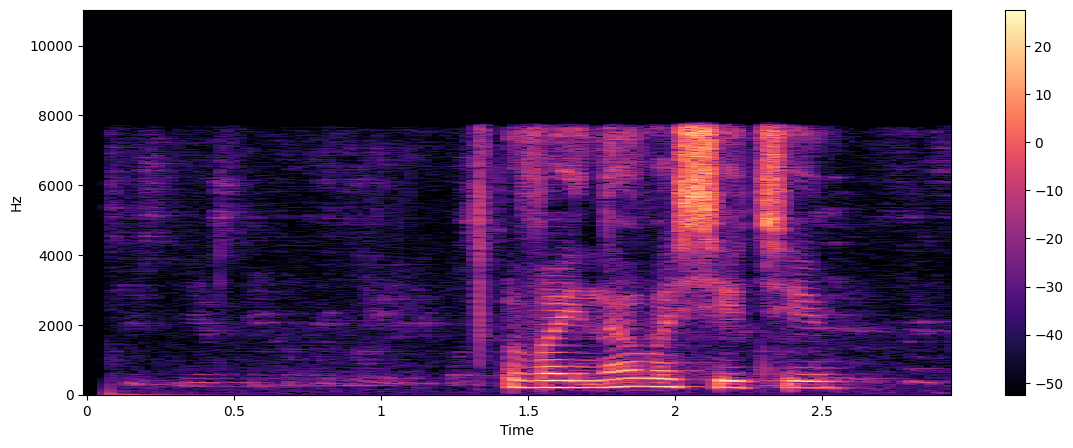

In [ ]:
X = librosa.stft(y)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

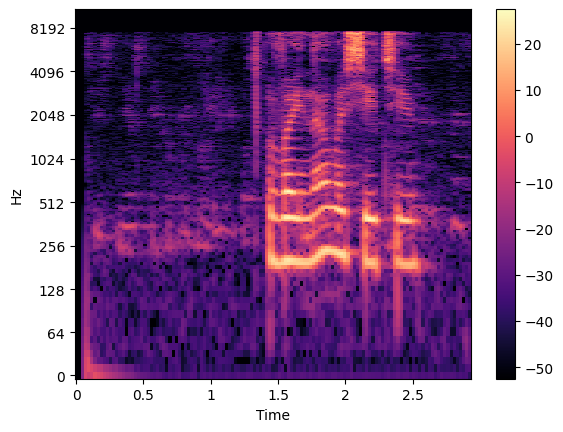

In [ ]:
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='log')
plt.colorbar()

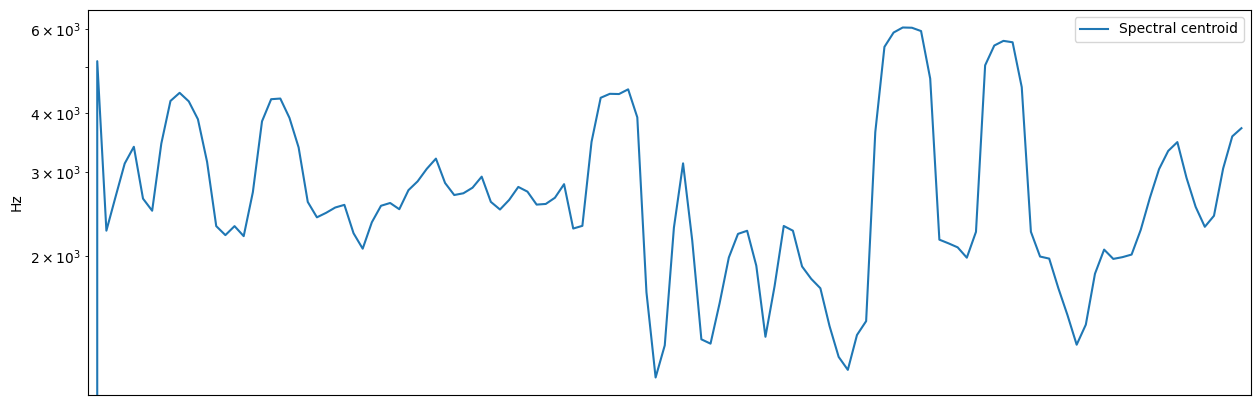

In [ ]:
# Spectral Centroid
cent = librosa.feature.spectral_centroid(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.subplot(1, 1, 1)
plt.semilogy(cent.T, label='Spectral centroid')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, cent.shape[-1]])
plt.legend()

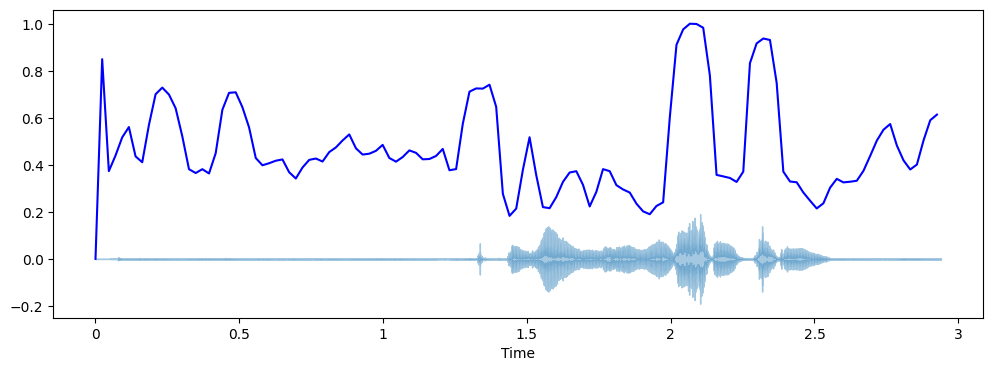

In [ ]:
import sklearn
spectral_centroids = librosa.feature.spectral_centroid(y=y, sr=sr)[0]
spectral_centroids.shape

# Вычисление временной переменной для визуализации
plt.figure(figsize=(12, 4))
frames = range(len(spectral_centroids))
t = librosa.frames_to_time(frames)
# Нормализация спектрального центроида для визуализации
def normalize(y, axis=0):
    return sklearn.preprocessing.minmax_scale(y, axis=axis)
# Построение спектрального центроида вместе с формой волны
librosa.display.waveshow(y=y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_centroids), color='b')

Text(0.5, 1.0, 'Spectral contrast')

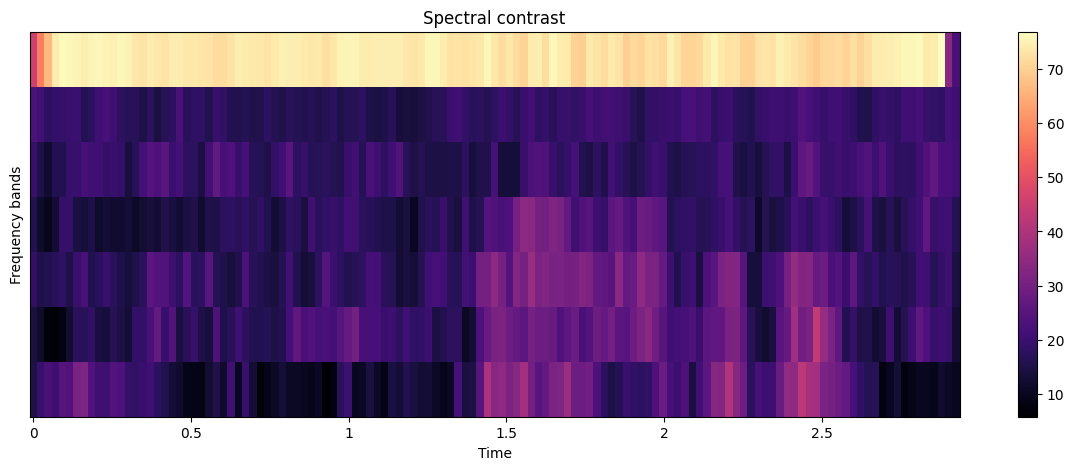

In [ ]:
# Spectral Contrast
contrast=librosa.feature.spectral_contrast(y=y_harmonic,sr=sr)
plt.figure(figsize=(15,5))
librosa.display.specshow(contrast, x_axis='time')
plt.colorbar()
plt.ylabel('Frequency bands')
plt.title('Spectral contrast')

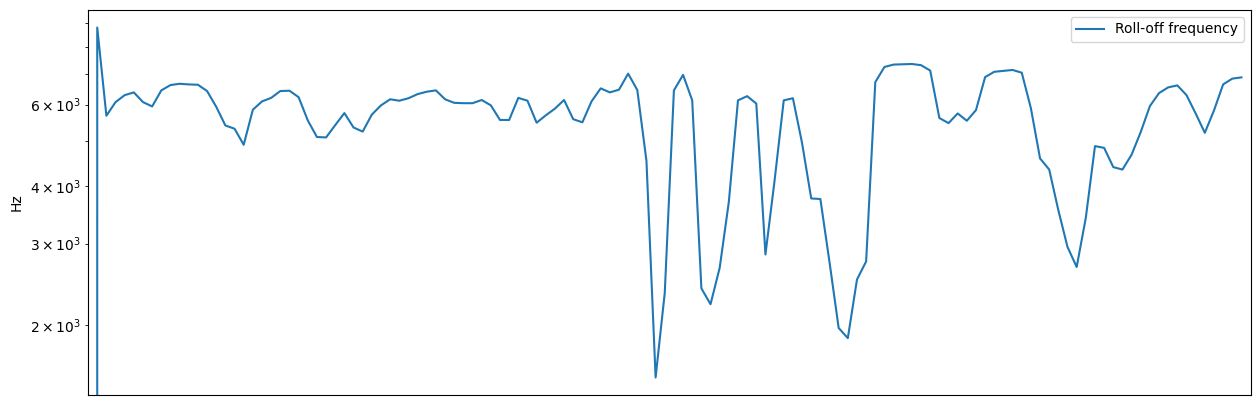

In [ ]:
# Spectral Rolloff
rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
plt.figure(figsize=(15,5))
plt.semilogy(rolloff.T, label='Roll-off frequency')
plt.ylabel('Hz')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

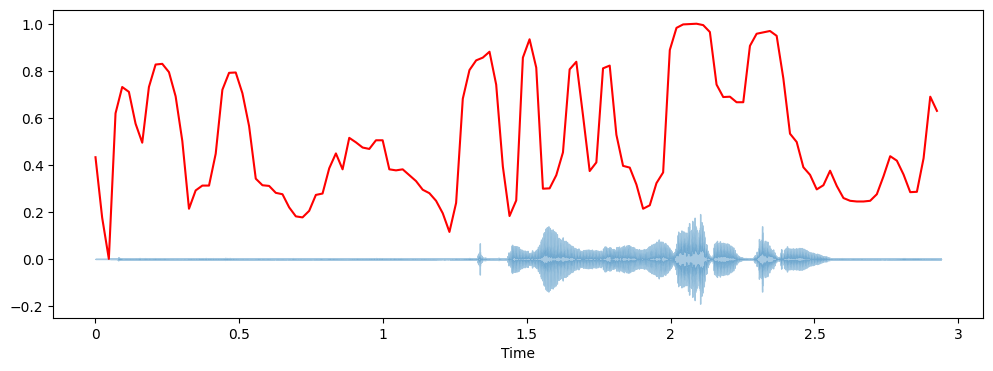

In [ ]:
spectral_rolloff = librosa.feature.spectral_rolloff(y=y+0.01, sr=sr)[0]
plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_rolloff), color='r')

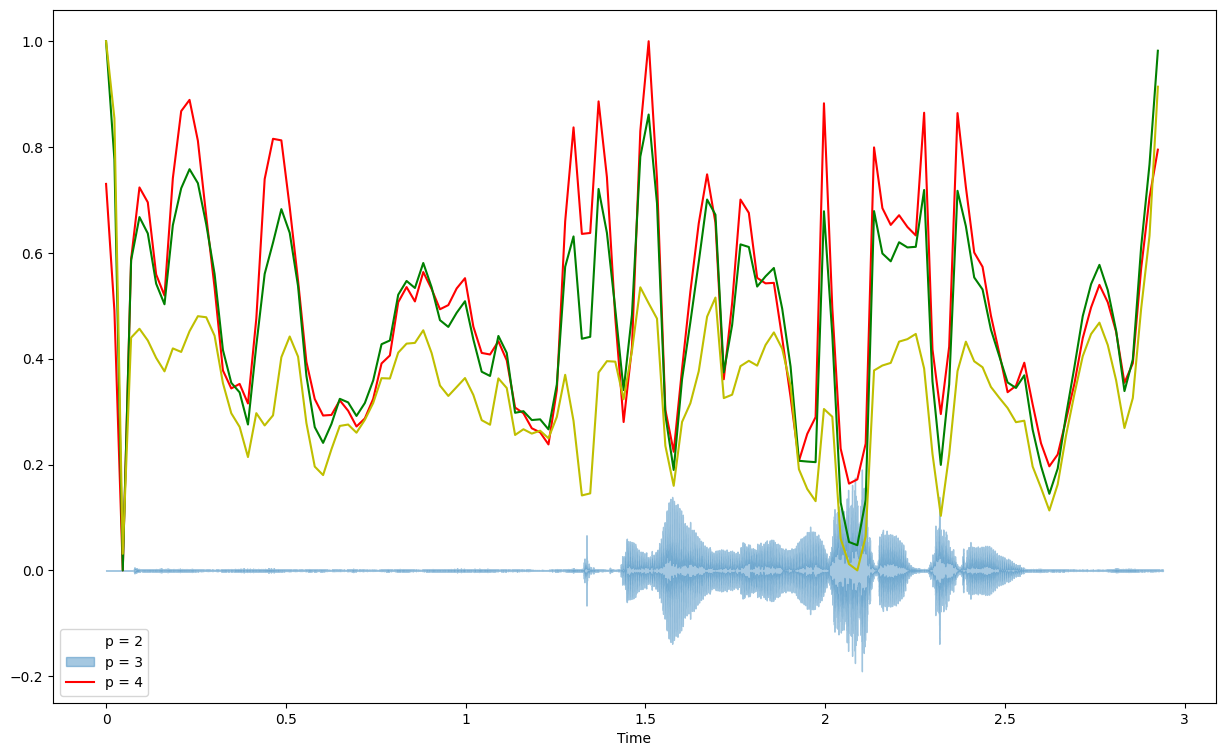

In [ ]:
spectral_bandwidth_2 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr)[0]
spectral_bandwidth_3 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=3)[0]
spectral_bandwidth_4 = librosa.feature.spectral_bandwidth(y=y+0.01, sr=sr, p=4)[0]
plt.figure(figsize=(15, 9))
librosa.display.waveshow(y, sr=sr, alpha=0.4)
plt.plot(t, normalize(spectral_bandwidth_2), color='r')
plt.plot(t, normalize(spectral_bandwidth_3), color='g')
plt.plot(t, normalize(spectral_bandwidth_4), color='y')
plt.legend(('p = 2', 'p = 3', 'p = 4'))

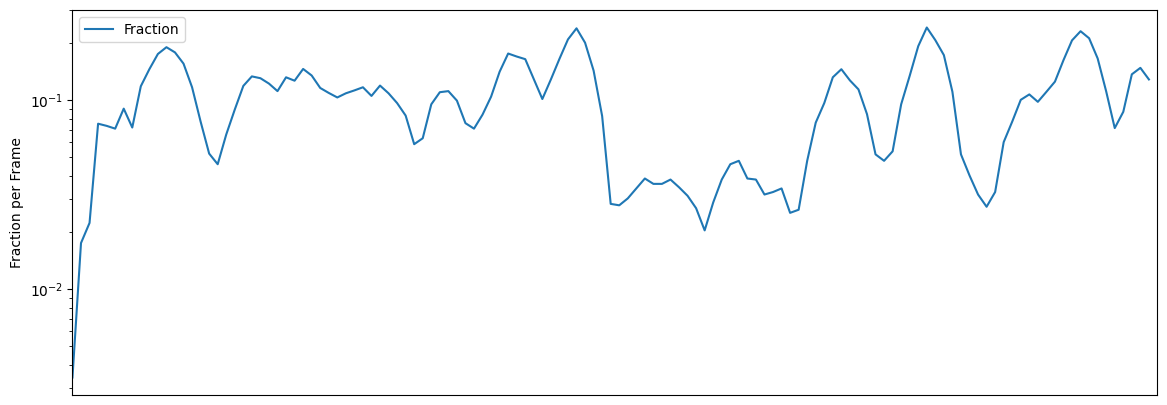

In [ ]:
zrate=librosa.feature.zero_crossing_rate(y_harmonic)
plt.figure(figsize=(14,5))
plt.semilogy(zrate.T, label='Fraction')
plt.ylabel('Fraction per Frame')
plt.xticks([])
plt.xlim([0, rolloff.shape[-1]])
plt.legend()

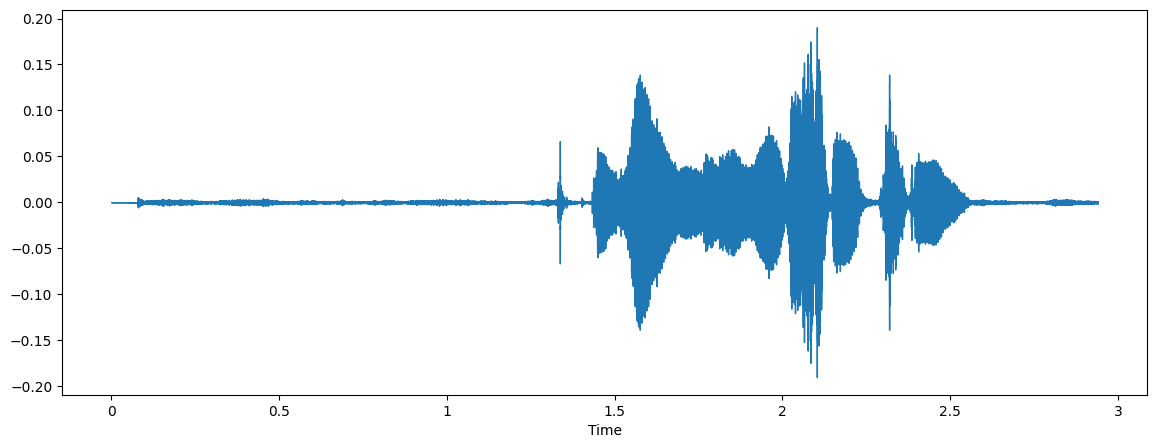

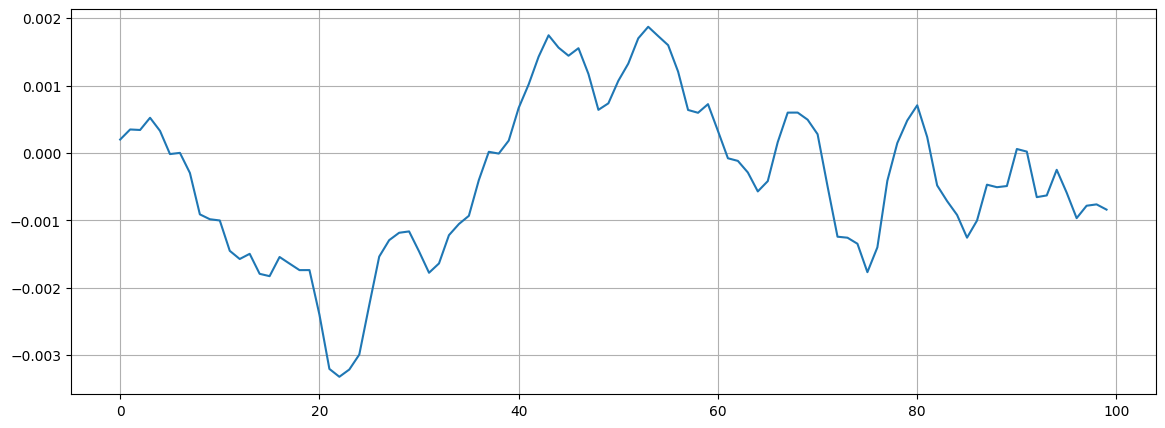

In [ ]:
# Построение графика сигнала:
plt.figure(figsize=(14, 5))
librosa.display.waveshow(y, sr=sr)
# Увеличение масштаба:
n0 = 9000
n1 = 9100
plt.figure(figsize=(14, 5))
plt.plot(y[n0:n1])
plt.grid()

In [ ]:
zero_crossings = librosa.zero_crossings(y[n0:n1], pad=False)
print(sum(zero_crossings))

13
